<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/presentation_visiualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

Mounted at /gdrive


In [0]:
%cd "/gdrive/My Drive/tensor-flow-state/tensor-flow-state"

/gdrive/My Drive/tensor-flow-state/tensor-flow-state


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('tableau-colorblind10')
mpl.rcParams.update({"lines.linewidth": 1, "font.family": "serif", "xtick.labelsize": "small", "ytick.labelsize": "small", "figure.figsize": (16,9), "figure.dpi": 300, "figure.autolayout": True, "savefig.format": "png", "savefig.transparent": True})
plotdir = "../../Internship_Wagga/Final Presentation/"

# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))   

#006BA4
#FF800E
#ABABAB
#595959
#5F9ED1
#C85200
#898989
#A2C8EC
#FFBC79
#CFCFCF


In [0]:
import pandas as pd
df = pd.read_csv("data/final_data.csv", index_col = 0, parse_dates = True)

In [0]:
import numpy as np
dfr = df[df.index.year == 2018].resample("D").agg({"speed": np.mean, "flow": np.sum})

In [0]:
y = [dfr.flow.min(), dfr.flow.mean(), dfr.flow.max()]

In [0]:
temp = df.resample('W').sum()['flow'][1:-1]

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


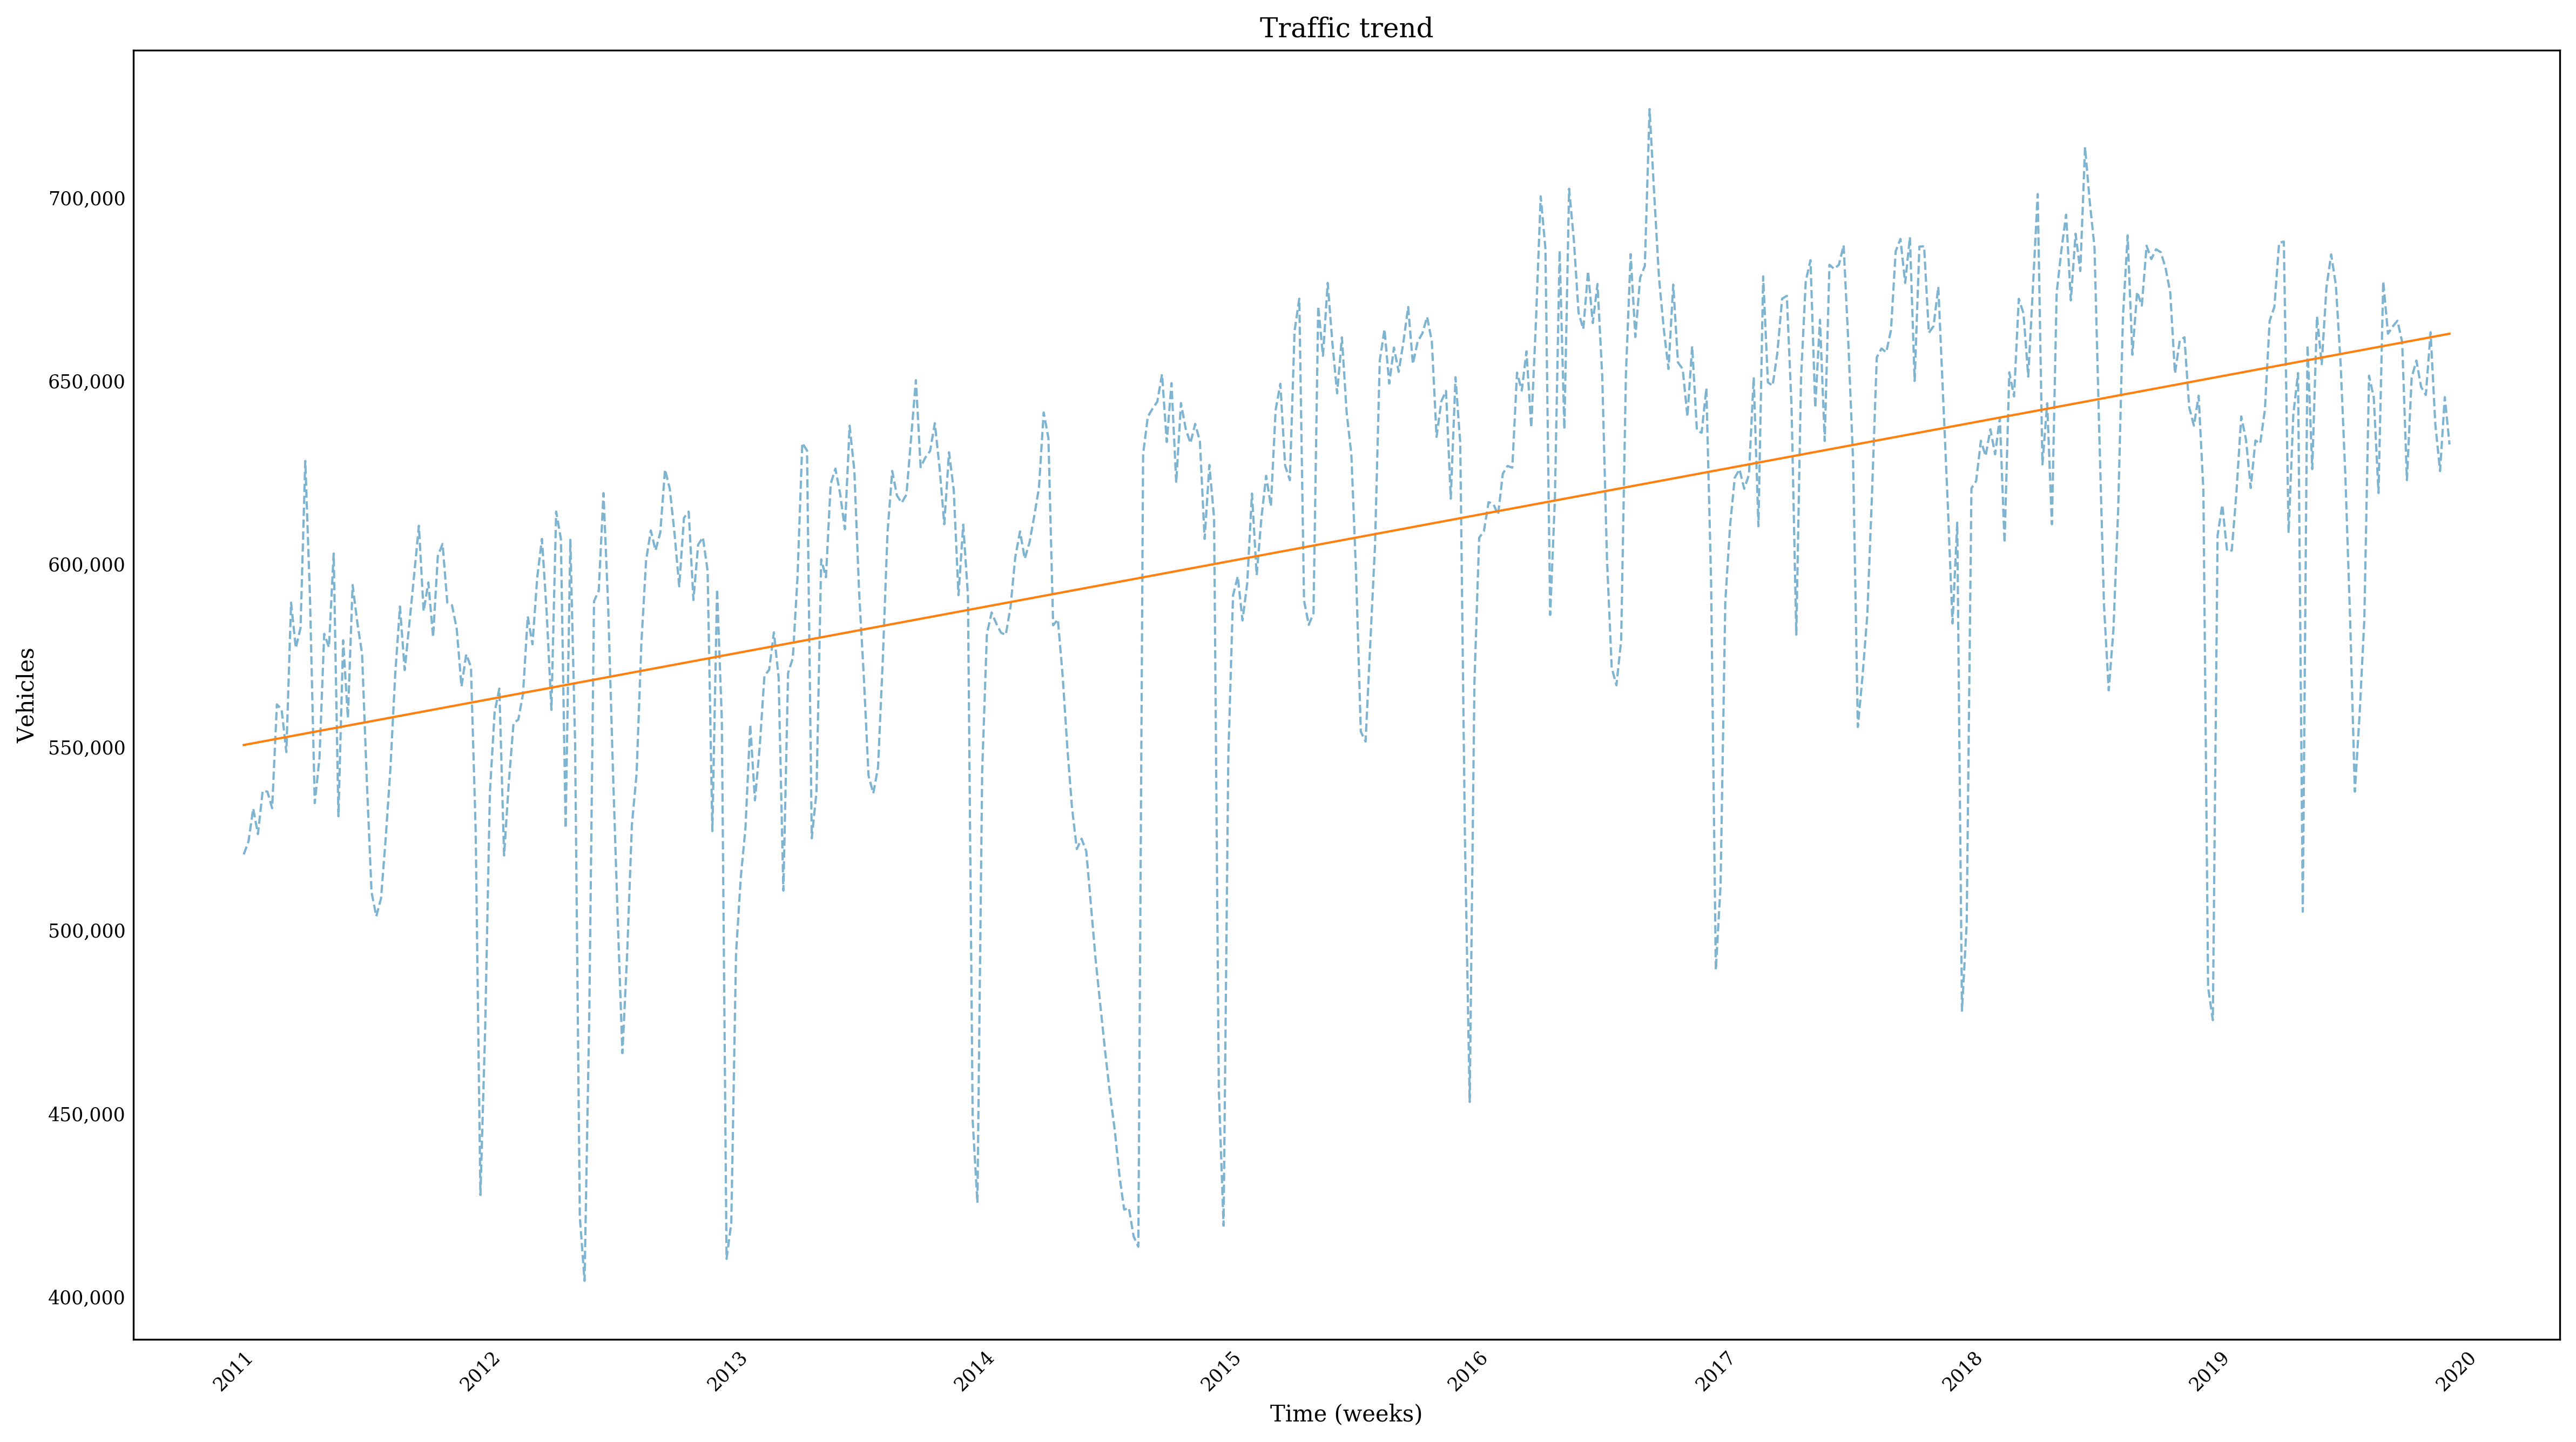

In [0]:
y = temp.values
x = temp.index
xx = pd.to_timedelta(x).total_seconds()
z = np.polyfit(xx, y, 1)
p = np.poly1d(z)

fig, ax = plt.subplots()
ax.plot(x, y, color = colors[0], linestyle = "--", lw = 1, label = "Flow", alpha = 0.5)
ax.plot(x, p(xx), color = colors[1], linestyle = "-", lw = 1, label = "Trend")
ax.tick_params(axis = 'both', which = 'both',length = 0)
plt.xticks(rotation=45)
ax.set_ylabel("Vehicles")
ax.set_xlabel("Time (weeks)")
ax.set_title("Traffic trend")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='both', which='both', length=0)

fig.savefig(plotdir + "flow_trend")

In [0]:
temp = df.resample('W').mean()['speed']

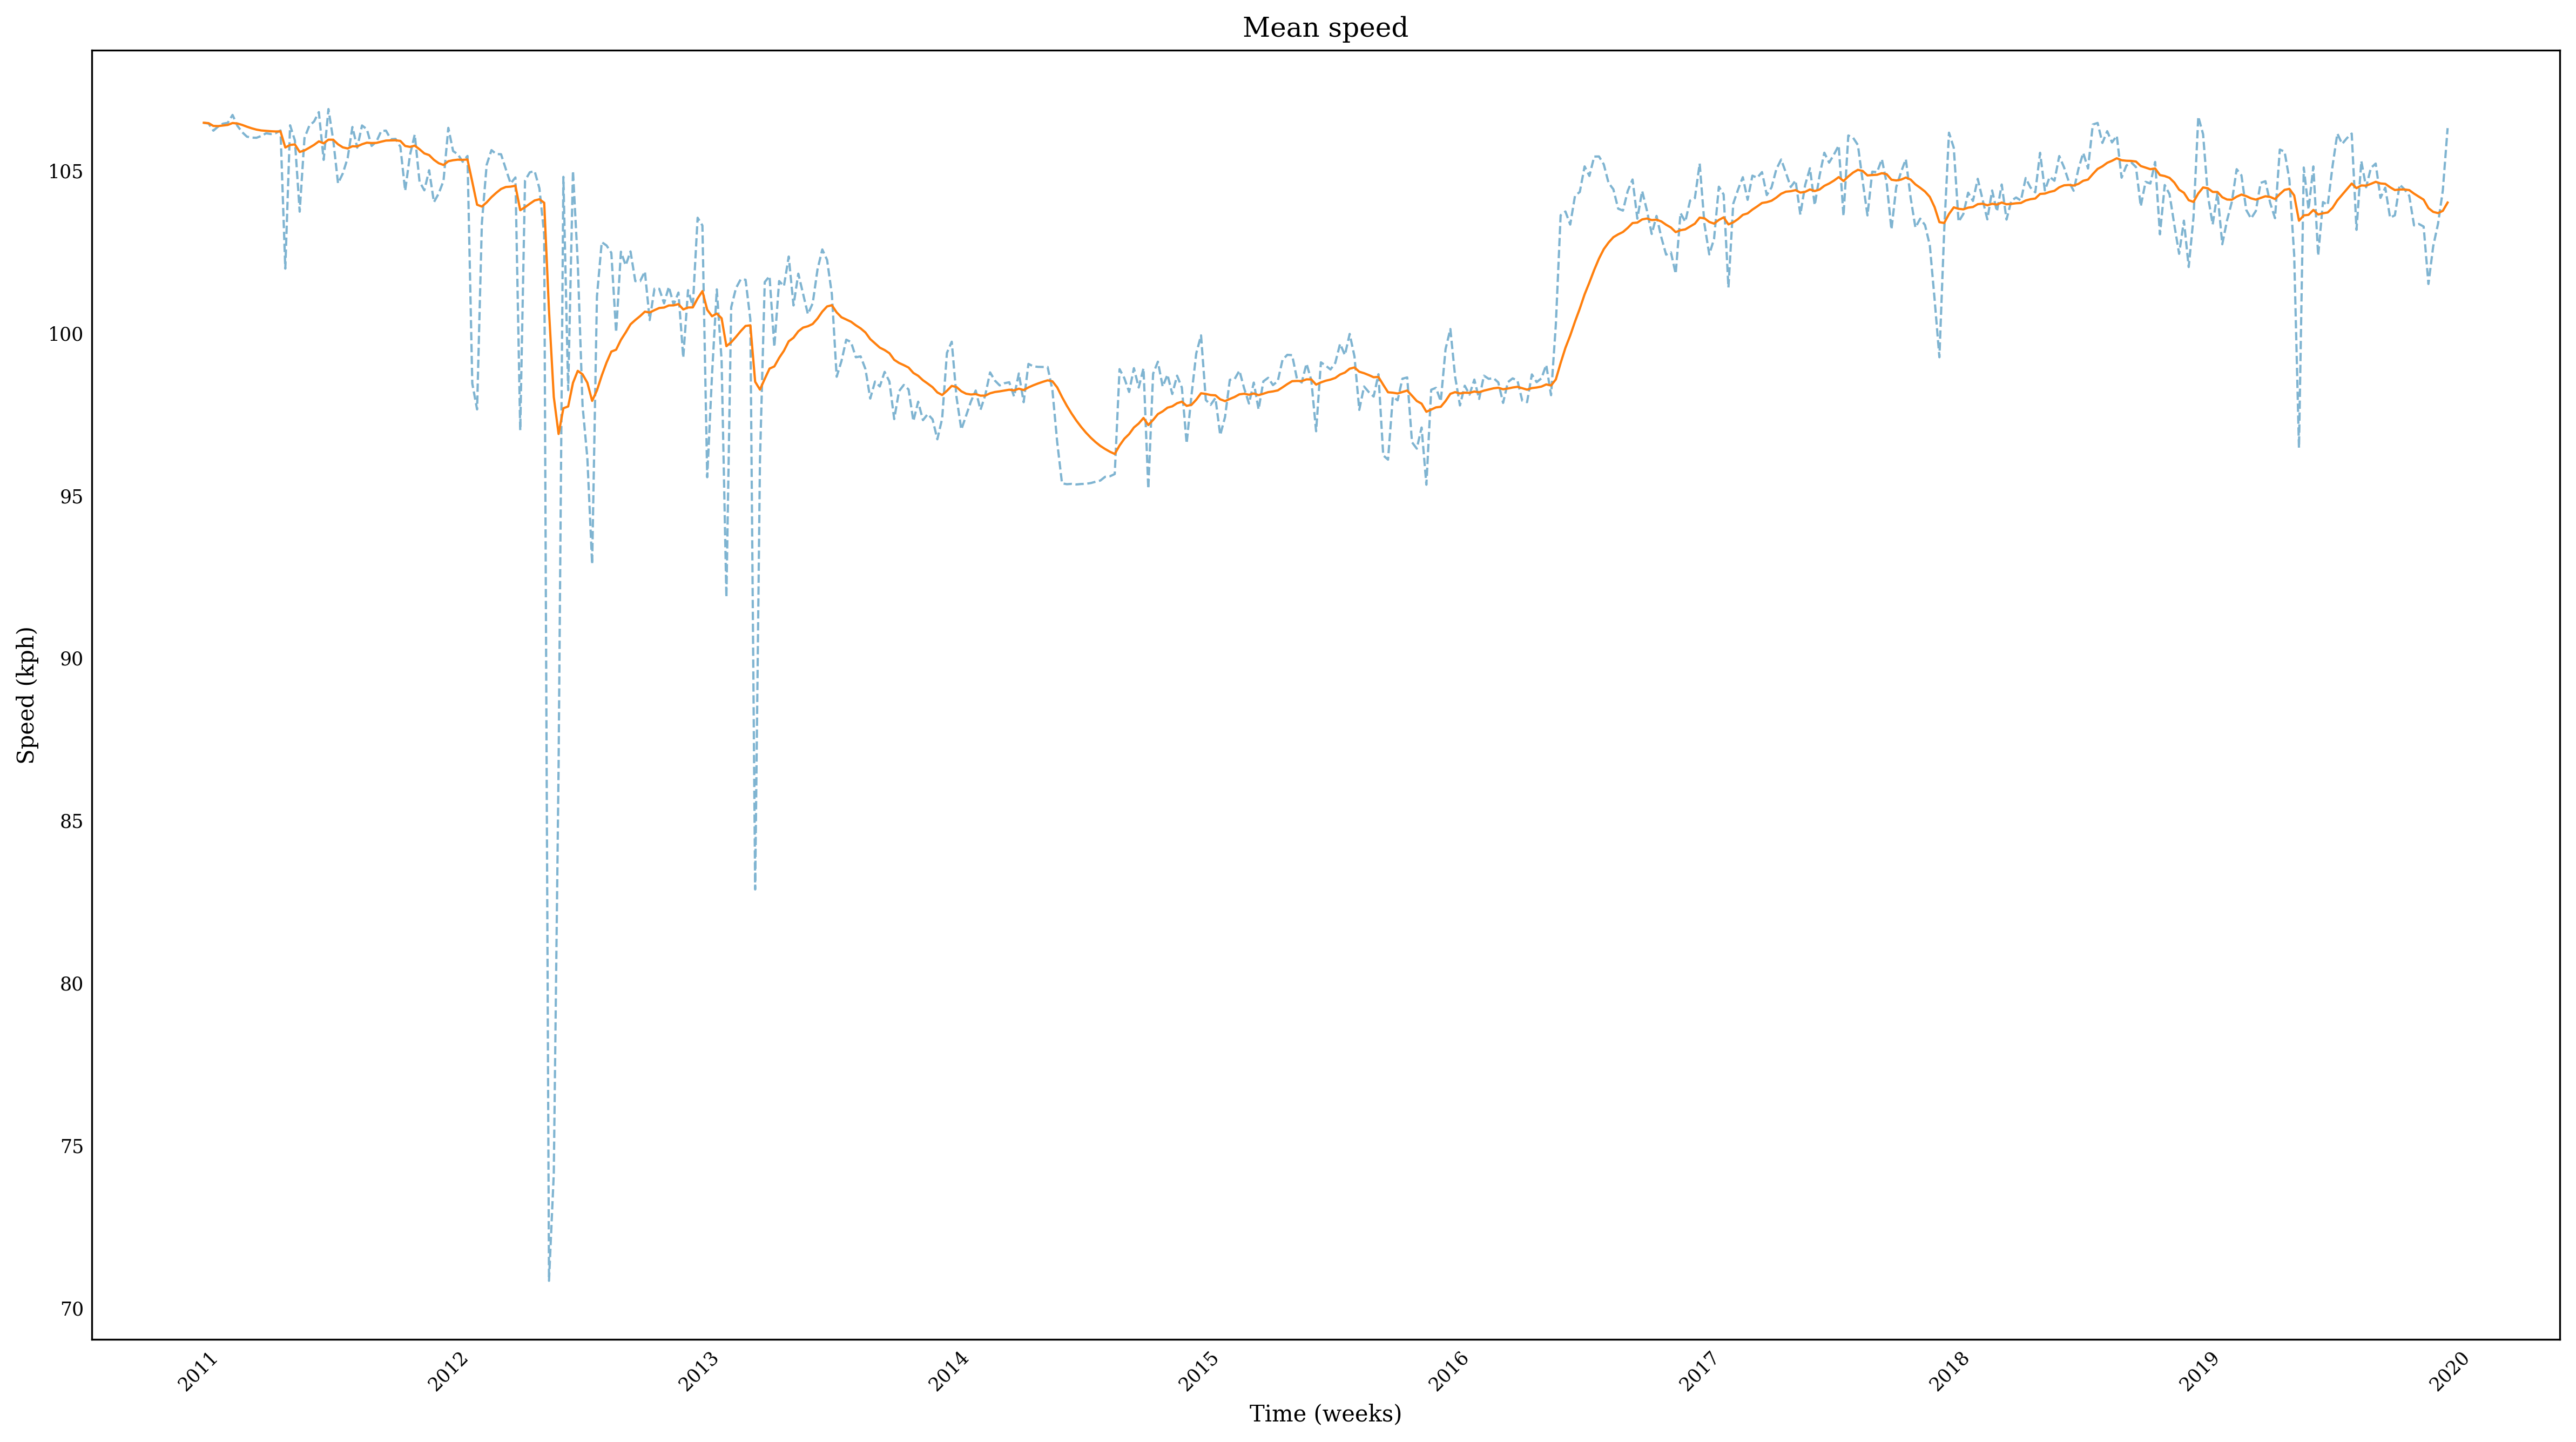

In [0]:
y = temp.values
y1 = temp.ewm(9).mean()
x = temp.index

fig, ax = plt.subplots()
ax.set_title("Mean speed")
ax.set_ylabel("Speed (kph)")
ax.set_xlabel("Time (weeks)")
ax.plot(x, y, linestyle = '--', lw = 1, label = 'Speed', alpha = 0.5)
ax.plot(x, y1, lw = 1, label = 'Speed, smoothed')
# ax.set_ylim(70, 110)
ax.tick_params(axis='both', which='both', length=0)
plt.xticks(rotation=45)
fig.savefig(plotdir + "mean_speed")

In [0]:
Partial Autocorrelation